This document is referring to the second course project of the COS "Applied Data Science: Machine Learning"
# Course Project Topic: Open Food Facts
- Exploration of nutrition facts from foods around the world
- Messy, incomplete, unformatted format from different sources (Open Food Facs dataset from Kaggle)
- This is a data set of food products listing the ingredients and nutritional facts of more than 300,000 foods from over 150 countries in the world.
- Goal: get this data in the best shape possible for analysis

The data is meant to be free to the public to help users decode food labels, and make better food choices in general.

The enumerations (A. - F.) are referring exactly to the list of tasks from EPFL.

In [1]:
# Import required packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

## A. Data import and high level exploration

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Exploratory data analysis**

- What is the proportion of missing values per column/row? 
- Should I keep, fill or remove these missing values? What would be the implications?
- What are the different columns data types?

In [3]:
df.shape

(356027, 163)

In [4]:
# list(df.columns) to get an overview of all columns included

In [5]:
df.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


At first sight there seems to be a lot of missing values in the data and some columns might not be required for my data analysis (e.g. 'url' does not provide value-added information). First I am going to replace all values representing a Zero value (e.g. 0.0000, 0, 0.00) with NaN.

In [6]:
df.replace([0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.0000000], np.nan, inplace=True)

In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100

The data types are float64 and object. Be aware that the data type for instance for 'code' is object instead of int or float

Proportion of missing values per column:

In [8]:
#for column in df.columns:
#    prop_null = df.isnull().sum()[column]/df.shape[0]
#    print(column, round(prop_null,2))

Since there is a significant amount of missing values I will select all columns with a proportion of missing values more than 66% for a better overview:

In [9]:
#for column in df.columns:
#    if df.isnull().sum()[column]/df.shape[0] > 0.66:
#        print(column)

**Findings:** Columns missing more than 2/3 of data can be removed due to lack of adding-value.

Drop columns if all values are NA:

In [10]:
df_short = df.dropna(axis=1, how='all')

In [11]:
df_short.shape

(356027, 147)

DataFrame has been reduced to an overseeable amount of columns but still has a lot of missing values per column:

In [12]:
df_short.isna().sum()

code                                    26
url                                     26
creator                                  3
created_t                                4
created_datetime                        10
                                     ...  
collagen-meat-protein-ratio_100g    355845
cocoa_100g                          354644
carbon-footprint_100g               355775
nutrition-score-fr_100g             115853
nutrition-score-uk_100g             117267
Length: 147, dtype: int64

In [13]:
df_short.dropna(axis=1, thresh=(356027-((0.66)*356027)), inplace=True)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


All columns with more than 2/3 null values have been dropped since they are negatively affecting the accuracy and reliablity of my analysis results

In [14]:
df_short.shape

(356027, 36)

Proportion of missing values per row (added as a new row to the dataframe):

In [15]:
df_short['prop_null_row'] = round(df_short.isnull().sum(axis=1)/df_short.shape[1],2)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Select all rows with a proportion of missing values more than 60% for a better overview:

In [16]:
df_short[df_short['prop_null_row']>0.66].shape[0]

129

Consistently I am supposed to remove of rows missing more than 2/3 of data set. However the number of rows is relatively low which will not have a significant effect on the completeness of the data set. 

In [17]:
df_short.drop(columns='prop_null_row', inplace=True)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df_short.isna().sum()

code                           26
url                            26
creator                         3
created_t                       4
created_datetime               10
last_modified_t                 0
last_modified_datetime          0
product_name                17512
brands                      29050
brands_tags                 29070
countries                     275
countries_tags                275
countries_en                  275
ingredients_text            72134
serving_size               139406
additives_n                185838
additives                   72202
additives_tags             185838
additives_en               185838
nutrition_grade_fr         101171
pnns_groups_1              227021
pnns_groups_2              223338
states                         52
states_tags                    52
states_en                      52
energy_100g                 70076
fat_100g                   144815
saturated-fat_100g         166241
carbohydrates_100g         100346
sugars_100g   

-------

Which columns can be deleted due to no value-adding information for the tasks (e.g. 'weblink')?

In [19]:
df_short.info

<bound method DataFrame.info of                  code                                                url  \
0                3087  http://world-en.openfoodfacts.org/product/0000...   
1                4530  http://world-en.openfoodfacts.org/product/0000...   
2                4559  http://world-en.openfoodfacts.org/product/0000...   
3               16087  http://world-en.openfoodfacts.org/product/0000...   
4               16094  http://world-en.openfoodfacts.org/product/0000...   
...               ...                                                ...   
356022       99567453  http://world-en.openfoodfacts.org/product/9956...   
356023  9970229501521  http://world-en.openfoodfacts.org/product/9970...   
356024  9977471758307  http://world-en.openfoodfacts.org/product/9977...   
356025  9980282863788  http://world-en.openfoodfacts.org/product/9980...   
356026   999990026839  http://world-en.openfoodfacts.org/product/9999...   

                           creator   created_t      cre

After carefully reviewing the values per column I decided to drop 'url','creator','created_t','last_modified_t'since they do not contribute adding-value to my analysis. 

In [20]:
df_short.drop(columns=['url','creator','created_t','last_modified_t','last_modified_datetime','created_datetime'], inplace=True)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df_short.nunique()

code                       355839
product_name               249245
brands                      66961
brands_tags                 56804
countries                    1637
countries_tags                784
countries_en                  779
ingredients_text           238920
serving_size                25928
additives_n                    29
additives                  228280
additives_tags              39941
additives_en                39941
nutrition_grade_fr              5
pnns_groups_1                  14
pnns_groups_2                  42
states                       1068
states_tags                  1068
states_en                    1068
energy_100g                  4092
fat_100g                     3528
saturated-fat_100g           2306
carbohydrates_100g           5614
sugars_100g                  4193
fiber_100g                   1149
proteins_100g                2632
salt_100g                    5955
sodium_100g                  5635
nutrition-score-fr_100g        54
nutrition-scor

In [22]:
df_short.head(1)

,code,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,additives_n,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All irrelevant columns or duplicated rows have been removed. 


For all remaining null values I will clean them as much as necessary to get reasonable results once I know which columns I will use for my analysis

-------

Which column could serve as an index (i.e. have unique values)? 

In [23]:
df_short['code'].nunique()

355839

In [24]:
df_short['code'].isnull().value_counts()

False    356001
True         26
Name: code, dtype: int64

In [25]:
df_short.loc[df_short['code'].isnull(), 'code'] # all null values

193908    NaN
193944    NaN
193950    NaN
193960    NaN
193993    NaN
194001    NaN
194003    NaN
194009    NaN
194055    NaN
194084    NaN
194086    NaN
194090    NaN
194092    NaN
194102    NaN
194104    NaN
194111    NaN
194114    NaN
194190    NaN
194210    NaN
194212    NaN
194227    NaN
194255    NaN
194257    NaN
194288    NaN
194311    NaN
194323    NaN
Name: code, dtype: object

In [26]:
df_short.groupby('code').size().sort_values(ascending=False)[0:(356001-355839-1)] # all dupliacted values

code
70650800367    3
16571910303    2
20004552       2
42187216195    2
74880030037    2
              ..
70650800312    2
75925302317    2
75925302300    2
13562000777    2
13562000784    2
Length: 161, dtype: int64

Unique rows in column 'code' (355'839) < All rows in column 'code' (356'027) => there are duplicates in this column

Total of 26 NaN values in the column 'code'. 

**Finding:** After cleaning up duplicates and NaN values I can use this column as an index. For my analyses I do not think that this index will be needed hence I will keep the data set index unchanged for the time being.

-------

What are the mean/min/max/median values of numerical columns? 

In [27]:
df_num = df.select_dtypes(np.number) # be aware that all columns set as 'object' per default (e.g. 'code') have been dropped although they actually include numbers as values

In [28]:
df_num.describe().loc[['mean', 'min', 'max', '50%']]

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
mean,NaN,3.130496,1.012021,NaN,1.183487,NaN,NaN,1162.513055,725.876586,7.419201e+04,...,46.988479,60.509901,15.362637,52.102675,NaN,370.435733,9.726469,9.586086,NaN,NaN
min,NaN,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.020000,6.360000,1.000000e-04,...,1.000000,0.900000,8.000000,6.000000,NaN,0.000001,-15.000000,-15.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN
50%,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN,1138.000000,522.000000,1.126000e+01,...,50.000000,58.000000,15.000000,52.000000,NaN,205.000000,11.000000,10.000000,NaN,NaN


Do I spot any issue from analyzing those statistics? ex. a negative amount of sugar, a maximum value extremely far from the 75% percentile (outlier?)

In [29]:
df_num.sugars_100g.describe()

count    239183.000000
mean         18.294786
std          22.718959
min         -17.860000
25%           2.920000
50%           8.570000
75%          28.000000
max        3520.000000
Name: sugars_100g, dtype: float64

For example sugar does really provide some issues when it comes to statistics. The min is negative (-17.86) and the max (3520) is extremely far from the 75% percentile (28) which may indicate an outlier

In [30]:
Q1 = np.percentile(df_num.sugars_100g.dropna(), 25, axis=0)
Q3 = np.percentile(df_num.sugars_100g.dropna(), 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound, upper_bound))

Lower bound: -34.7000, upper bound: 65.6200


In [31]:
boxplot_filter = (df_num.sugars_100g.dropna() < lower_bound) | (df_num.sugars_100g.dropna() > upper_bound)
print("Number of outliers detected per feature using a boxplot:")
print(boxplot_filter.sum(axis=0))
print("Total number of outliers detected:", boxplot_filter.sum(axis=0).sum())

Number of outliers detected per feature using a boxplot:
11357
Total number of outliers detected: 11357


Indeed the column "sugars_100g" shows 11'357 outliers when using the interquartile range (IQR)

----

For numerical columns, how does the variable distribution look like? ex. using histograms or scatter/violin/density plots

In [32]:
list(df_num.columns)

['no_nutriments',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoi

Ploting all numerical columns as histograms without removing outliers will result in useless graphs. This is why I am focusing on the two variables additives_n and nutrition-score-fr_100g.

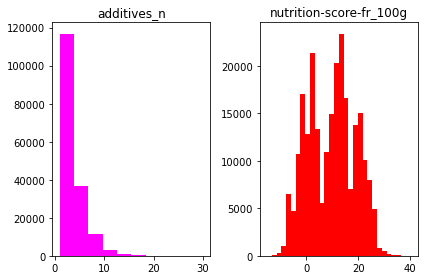

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2,tight_layout=True)
axes[0].set(title='additives_n')
axes[1].set(title='nutrition-score-fr_100g')
axes[0].hist(df_num['additives_n'], color='magenta', linewidth = 3)
axes[1].hist(df_num['nutrition-score-fr_100g'], color='red', linewidth = 3, bins=30);

Are the products number of food additives (additives_n) correlated with the nutrition score?

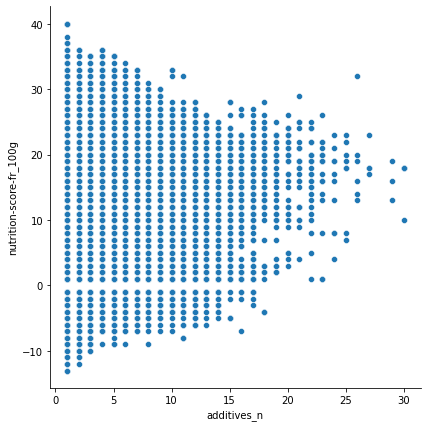

In [34]:
sns.pairplot(df_num, x_vars=['additives_n'], y_vars = ['nutrition-score-fr_100g'], height=6);

There seems to be a slight concentration around nutrition score fr_100g 10-20 for a higher number of food additives

-----

Are there columns that contain lists? ex. lists of ingredients, tags

In [35]:
list(df_short.columns)

['code',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [36]:
df_short.ingredients_text[1]

'Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.'

In [37]:
df_short.countries[0]

'en:FR'

In [38]:
df_short.countries_tags[0]

'en:france'

In [39]:
df_short.countries_en[0]

'France'

**Findings:**
- ingredients_text: contains list of ingredients
- countries_tags: contains list of countries tags (similar tag related columns for brand, additives and states) 

Note: there are further columns in the original data set containig lists (e.g. categories) which have been previously dropped due to a proportion of NaN values > 66%

----

Are there columns that are very similar in their content?

In [40]:
df[df['categories'].notnull()].loc[:,['categories','categories_en','categories_tags']]

,categories,categories_en,categories_tags
47,Filet de bœuf,fr:Filet-de-boeuf,fr:filet-de-boeuf
176,Légumes-feuilles,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba..."
177,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","Sugary snacks,Biscuits and cakes,Pastries","en:sugary-snacks,en:biscuits-and-cakes,en:past..."
179,"Plant-based foods and beverages,Plant-based fo...","Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba..."
182,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","Sugary snacks,Biscuits and cakes,Pastries","en:sugary-snacks,en:biscuits-and-cakes,en:past..."
...,...,...,...
356016,pl:Szprot,pl:Szprot,pl:szprot
356017,thés verts,"Plant-based foods and beverages,Beverages,Hot ...","en:plant-based-foods-and-beverages,en:beverage..."
356019,"Viandes,Produits à tartiner,Charcuteries,Produ...","Meats,Spreads,Prepared meats,Salted spreads,Ri...","en:meats,en:spreads,en:prepared-meats,en:salte..."
356020,Peanuts,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba..."


In [41]:
df[df['countries'].notnull()].loc[:,['countries','countries_en','countries_tags']]

,countries,countries_en,countries_tags
0,en:FR,France,en:france
1,US,United States,en:united-states
2,US,United States,en:united-states
3,US,United States,en:united-states
4,US,United States,en:united-states
...,...,...,...
356022,US,United States,en:united-states
356023,China,China,en:china
356024,France,France,en:france
356025,en:FR,France,en:france


Columns with suffix _tags or _en contain redundant information

------

Are columns with text always written using the same alphabet?

In [42]:
df_short.product_name

0                                        Farine de blé noir
1                            Banana Chips Sweetened (Whole)
2                                                   Peanuts
3                                    Organic Salted Nut Mix
4                                           Organic Polenta
                                ...                        
356022    Mint Melange Tea A Blend Of Peppermint, Lemon ...
356023                                              乐吧泡菜味薯片
356024                                        Biscottes bio
356025                             Tomates aux Vermicelles 
356026                      Sugar Free Drink Mix, Peach Tea
Name: product_name, Length: 356027, dtype: object

In [43]:
df_short.brands

0         Ferme t'y R'nao
1                     NaN
2          Torn & Glasser
3               Grizzlies
4          Bob's Red Mill
               ...       
356022       Trader Joe's
356023                 乐吧
356024       Leader Price
356025              Knorr
356026      Market Pantry
Name: brands, Length: 356027, dtype: object

For instance the text of column product_name and brands contain Chinese alphabet (e.g. row 356023)

------

For categorical columns, what are the top 10 most frequent values?

In [44]:
columns_cat=[i for i in df_short.columns if df_short.dtypes[i]=='object']

In [45]:
for column in columns_cat:
    df_cat = df_short.select_dtypes(exclude=np.number).groupby(column)
    print(df_cat.size().sort_values(ascending=False)[0:10])

code
70650800367     3
16571910303     2
20004552        2
42187216195     2
74880030037     2
16571940348     2
11110881373     2
75925304892     2
9800800056      2
737628062508    2
dtype: int64
product_name
Ice Cream                 411
Extra Virgin Olive Oil    303
Potato Chips              281
Premium Ice Cream         226
Tomato Ketchup            190
Beef Jerky                167
Pinto Beans               162
Popcorn                   159
Cookies                   159
Salsa                     149
dtype: int64
brands
Carrefour       3670
Auchan          3217
U               2608
Casino          2091
Leader Price    2015
Meijer          1995
Kroger          1662
Cora            1374
Ahold           1370
Spartan         1341
dtype: int64
brands_tags
carrefour       3847
auchan          3334
u               2637
leader-price    2228
casino          2178
meijer          1996
kroger          1662
cora            1411
ahold           1370
spartan         1341
dtype: int64
countries
U

Are there duplicate products?

In [46]:
df.duplicated().value_counts()

False    356027
dtype: int64

No row is duplicated across the table

In [47]:
df[df.duplicated(subset=['product_name'],keep=False)==True].shape

(133602, 163)

133'602 duplicates incl. NaN values in the column 'product_name' 

In [48]:
df['product_name'].duplicated().value_counts()

False    249246
True     106781
Name: product_name, dtype: int64

106'781 duplicates in the column 'product_name' (excluding the first unique value respectively)

------

## B. In-depth analysis

Choose 3 interesting questions that must be complex enough to allow for some substantial data manipulation:

1. What's the proportion of the _100g ingredients for all products available in the US? 
2. Based on the first questions are there any significant difference between top 10 brands?
3. What product category is most prone to have low values of energy?

1. What's the proportion of the _100g ingredients for all products available in the US?

In [49]:
df_short_US = df_short[df_short['countries'] == 'US']

In [50]:
df_short_US.shape

(169789, 30)

for _100g variables check the following:
  - proportion of missing values for brands and _100g variables and how to handle them, **OK** (see below)
  - any duplicates and how to handle them => lots of duplicated values (expected for this analysis, therefore accepted), **OK**
  - appropriate data type of column => dtypes are **OK** 
  - any particular issues from analyzing statistics (non-logical negatives, outliers)**OK** (see below)
  - any lists in the columns => no, **OK** 
  - consistency (like alphabet)=> numbers only, **OK**

In [51]:
df_short_US.isnull().sum()

code                            0
product_name                  128
brands                        935
brands_tags                   935
countries                       0
countries_tags                  0
countries_en                    0
ingredients_text               86
serving_size                   86
additives_n                 59113
additives                      91
additives_tags              59113
additives_en                59113
nutrition_grade_fr          32312
pnns_groups_1              168835
pnns_groups_2              168835
states                          0
states_tags                     0
states_en                       0
energy_100g                  8844
fat_100g                    58422
saturated-fat_100g          83912
carbohydrates_100g          18674
sugars_100g                 42412
fiber_100g                  83601
proteins_100g               48706
salt_100g                   27342
sodium_100g                 27342
nutrition-score-fr_100g     40410
nutrition-scor

- brands: almost no missing values
- _100 g variables: saturated-fat_100g and fiber_100g have a significant proportion of null values => working assumption: missing values NOT due to bad data quality but because of missing nutrition in the product
- nutrition score fr/uk 100g: to be dropped since this is not relevant for the analysis

In [52]:
df_short_US[['fat_100g', 'saturated-fat_100g']]

,fat_100g,saturated-fat_100g
1,28.57,28.57
2,17.86,NaN
3,57.14,5.36
4,1.43,NaN
5,18.27,1.92
...,...,...
355968,9.72,2.78
355985,NaN,NaN
356004,NaN,NaN
356022,NaN,NaN


Working assumption: if saturated-fat_100g = NaN, then fat_100g = **un**saturated-fat_100g

In [53]:
df_short_US_1 = df_short_US[['product_name','brands','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']]

In [54]:
df_short_US_1.head(2)

,product_name,brands,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
1,Banana Chips Sweetened (Whole),NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,NaN,NaN
2,Peanuts,Torn & Glasser,1941.0,17.86,NaN,60.71,17.86,7.1,17.86,0.635,0.25


In [55]:
df_short_US_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169789 entries, 1 to 356026
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_name        169661 non-null  object 
 1   brands              168854 non-null  object 
 2   energy_100g         160945 non-null  float64
 3   fat_100g            111367 non-null  float64
 4   saturated-fat_100g  85877 non-null   float64
 5   carbohydrates_100g  151115 non-null  float64
 6   sugars_100g         127377 non-null  float64
 7   fiber_100g          86188 non-null   float64
 8   proteins_100g       121083 non-null  float64
 9   salt_100g           142447 non-null  float64
 10  sodium_100g         142447 non-null  float64
dtypes: float64(9), object(2)
memory usage: 15.5+ MB


In [56]:
round(df_short_US_1.describe().loc[['50%','mean', 'min', 'max', '75%']],2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
50%,1209.00,14.12,6.06,30.56,11.61,3.30,7.14,0.85,0.33
mean,1191.42,18.84,8.22,37.85,21.39,4.73,9.50,2.92,1.15
min,4.00,0.02,0.01,0.01,-17.86,-6.70,-800.00,0.00,0.00
max,231199.00,100.00,550.00,2916.67,3520.00,5380.00,430.00,64312.80,25320.00
75%,1674.00,27.27,11.54,64.29,33.33,6.20,12.82,1.63,0.64


- sugar, fiber and protein contain negative values
- all variables (except of fat_100g) have a maximum value extremely far from 75% percentile

Remove all negative values and all values over 100 for variables with suffix _100g (reason: it's per 100g hence cannot be more than 100):

In [57]:
def NaN_if_negative(x):
    if x < 0:
        return np.nan
    elif x > 100:
        return np.nan
    return x

In [58]:
df_short_US_1.fat_100g = df_short_US_1.fat_100g.apply(NaN_if_negative)
df_short_US_1['saturated-fat_100g'] = df_short_US_1['saturated-fat_100g'].apply(NaN_if_negative)
df_short_US_1.carbohydrates_100g = df_short_US_1.carbohydrates_100g.apply(NaN_if_negative)
df_short_US_1.sugars_100g = df_short_US_1.sugars_100g.apply(NaN_if_negative)
df_short_US_1.fiber_100g = df_short_US_1.fiber_100g.apply(NaN_if_negative)
df_short_US_1.proteins_100g = df_short_US_1.proteins_100g.apply(NaN_if_negative)
df_short_US_1.salt_100g = df_short_US_1.salt_100g.apply(NaN_if_negative)
df_short_US_1.sodium_100g = df_short_US_1.sodium_100g.apply(NaN_if_negative)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
round(df_short_US_1.describe().loc[['50%','mean', 'min', 'max', '75%']],2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
50%,1209.00,14.12,6.06,30.56,11.61,3.30,7.14,0.85,0.33
mean,1191.42,18.84,8.21,37.83,21.36,4.66,9.50,2.15,0.88
min,4.00,0.02,0.01,0.01,0.01,0.10,0.01,0.00,0.00
max,231199.00,100.00,100.00,100.00,100.00,100.00,100.00,99.91,100.00
75%,1674.00,27.27,11.54,64.29,33.33,6.20,12.82,1.63,0.64


Remove outliers based on the z-score (Manual outlier removal by z-score ("3 times the standard deviation from the mean"), if the distribution would not be skewed:

In [60]:
zscores_df = (df_short_US_1 - df_short_US_1.mean()) / (df_short_US_1.std())
zfilter_df = np.abs(zscores_df) > 3

In [61]:
print("Number of outliers detected per feature using z-scores:")
print(zfilter_df.sum(axis=0))
print("Total number of outliers detected:", zfilter_df.sum(axis=0).sum())

Number of outliers detected per feature using z-scores:
brands                   0
carbohydrates_100g       0
energy_100g             41
fat_100g              2888
fiber_100g            1725
product_name             0
proteins_100g         1827
salt_100g             1999
saturated-fat_100g    1014
sodium_100g           1973
sugars_100g           1695
dtype: int64
Total number of outliers detected: 13162


In [62]:
zfilter_any  = zfilter_df.any(axis=1)

In [63]:
outliers = df_short_US_1.loc[zfilter_any, :]
outliers.shape

(10567, 11)

In [64]:
df_wo = df_short_US_1.drop(outliers.index, axis=0)

Remove outliers based on IQR since the distributions of the numeric features is skewed (see histograms):

In [65]:
df_short_US_1_num = df_short_US_1.select_dtypes(np.number).dropna()

In [66]:
Q1 = np.percentile(df_short_US_1_num, 25, axis=0)
Q3 = np.percentile(df_short_US_1_num, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [67]:
boxplot_filter = (df_short_US_1_num < lower_bound) | (df_short_US_1_num > upper_bound)
print("Number of outliers detected per feature using a boxplot:")
print(boxplot_filter.sum(axis=0))
print("Total number of outliers detected:", boxplot_filter.sum(axis=0).sum())

Number of outliers detected per feature using a boxplot:
energy_100g              9
fat_100g               243
saturated-fat_100g    2499
carbohydrates_100g       0
sugars_100g             64
fiber_100g            1560
proteins_100g         3092
salt_100g             1781
sodium_100g           1782
dtype: int64
Total number of outliers detected: 11030


In [68]:
boxplot_filter_any  = boxplot_filter.any(axis=1)
boxplot_filter_any.head()

3     False
7     False
12    False
15    False
16     True
dtype: bool

In [69]:
outliers = df_short_US_1_num.loc[boxplot_filter_any, :]
outliers.shape

(8066, 9)

In [70]:
df_short_US_1_num_wo = df_short_US_1_num.drop(outliers.index, axis=0)

In [71]:
df_short_US_1_num_wo.shape

(33318, 9)

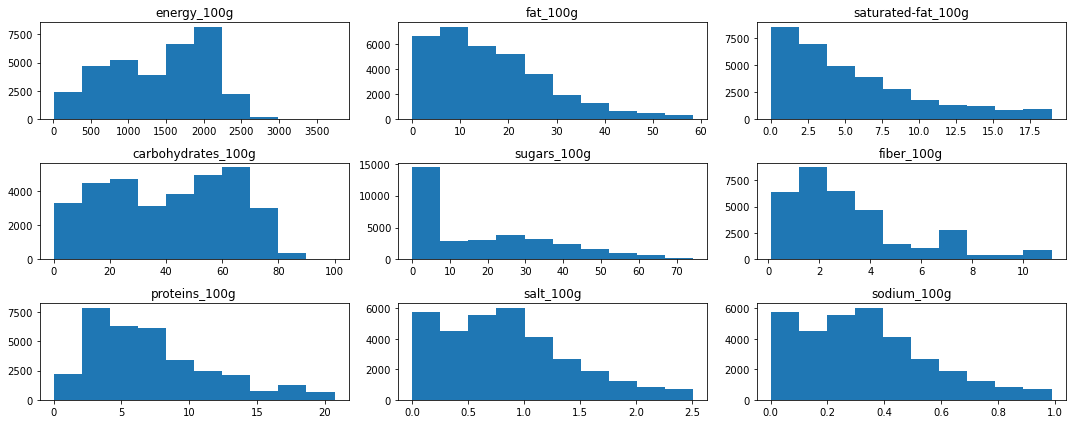

In [72]:
fig, axs = plt.subplots(3, 3, tight_layout=True,figsize=(15, 6))

axs[0,0].hist(df_short_US_1_num_wo['energy_100g'])
axs[0,0].set_title('energy_100g')
axs[0,1].hist(df_short_US_1_num_wo['fat_100g'])
axs[0,1].set_title('fat_100g')
axs[0,2].hist(df_short_US_1_num_wo['saturated-fat_100g'])
axs[0,2].set_title('saturated-fat_100g')
axs[1,0].hist(df_short_US_1_num_wo['carbohydrates_100g'])
axs[1,0].set_title('carbohydrates_100g')
axs[1,1].hist(df_short_US_1_num_wo['sugars_100g'])
axs[1,1].set_title('sugars_100g')
axs[1,2].hist(df_short_US_1_num_wo['fiber_100g'])
axs[1,2].set_title('fiber_100g')
axs[2,0].hist(df_short_US_1_num_wo['proteins_100g'])
axs[2,0].set_title('proteins_100g')
axs[2,1].hist(df_short_US_1_num_wo['salt_100g'])
axs[2,1].set_title('salt_100g')
axs[2,2].hist(df_short_US_1_num_wo['sodium_100g'])
axs[2,2].set_title('sodium_100g')
plt.show()

In [73]:
df_short_US_1_num_wo_100g = df_short_US_1_num_wo.loc[:,['fat_100g', 'saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']]


In [74]:
grouped_1 = df_short_US_1_num_wo_100g.mean().sort_values(ascending=False)
grouped_1

carbohydrates_100g    41.513697
sugars_100g           18.795625
fat_100g              16.514155
proteins_100g          7.217786
saturated-fat_100g     5.584846
fiber_100g             3.195687
salt_100g              0.849965
sodium_100g            0.334632
dtype: float64

In [75]:
grouped_1 = df_short_US_1_num_wo_100g.median().sort_values(ascending=False)
grouped_1

carbohydrates_100g    43.8600
fat_100g              14.1600
sugars_100g           12.8800
proteins_100g          6.2700
saturated-fat_100g     4.1700
fiber_100g             2.5000
salt_100g              0.7874
sodium_100g            0.3100
dtype: float64

**Findings:** The products within US contain relatively high proportion of fat, carbohydrates and sugars (even with the calculation of median due to skewed distributions)

2. Based on the first questions are there any significant difference between top 10 brands?

In [76]:
df_wo.value_counts('brands')[1:10]

brands
Kroger           1546
Ahold            1298
Spartan          1294
Roundy's         1205
Great Value      1117
Weis              991
Target Stores     910
Shoprite          891
Harris Teeter     763
dtype: int64

In [77]:
df_wo_brands = df_wo.set_index('brands')

In [78]:
df_wo_brands.loc['Kroger'].head(2)

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
brands,,,,,,,,,,
Kroger,Strawberry Preserves,1046.0,NaN,NaN,55.00,50.00,NaN,NaN,NaN,NaN
Kroger,Sandwich Slims,874.0,2.33,NaN,46.51,2.33,11.6,9.3,0.79756,0.314


In [79]:
df_wo_brands_top = df_wo_brands.loc[["Kroger", "Ahold", "Spartan", "Roundy\'s", "Great Value", "Weis", "Target Stores", "Shoprite", "Harris Teeter"]]
grouped_2 = df_wo_brands_top.groupby('brands').mean()
grouped_2

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
brands,,,,,,,,,
Ahold,1021.142739,15.746061,6.474871,31.879284,16.059476,3.546218,9.056684,0.976532,0.384461
Great Value,1032.964187,14.636276,7.562639,34.328014,14.819062,3.770973,9.686330,1.553111,0.611461
Harris Teeter,896.361673,15.544361,6.681597,26.853726,12.112028,3.558517,8.032149,1.247144,0.491001
Kroger,1012.368704,15.397129,6.444529,32.333404,15.471442,3.563755,9.001256,1.599864,0.629868
Roundy's,1130.105640,16.027421,6.383992,37.108996,17.561946,4.028251,8.916060,1.402961,0.552347
Shoprite,1033.660592,16.428634,8.414847,34.062903,14.696590,3.868872,9.724440,1.342543,0.528560
Spartan,1021.519935,15.632278,7.498548,33.837738,17.046965,3.646202,8.513126,1.460123,0.574852
Target Stores,1124.196188,16.338441,6.372025,34.063619,18.318322,3.665677,8.756431,1.036713,0.408155
Weis,1034.811262,14.812284,7.719939,34.112016,16.604280,3.458126,8.698117,1.287366,0.506837


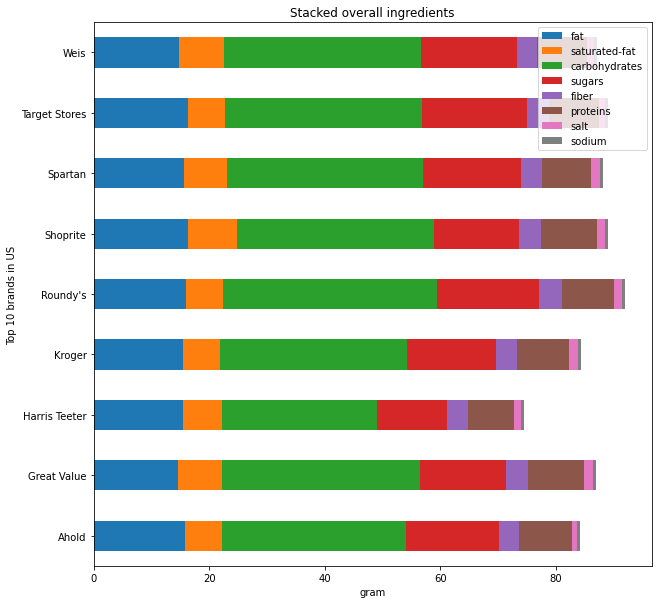

In [80]:
grouped_2.loc[:,'fat_100g':'sodium_100g'].plot(kind='barh',figsize=(10,10), stacked=True)
plt.legend(['fat', 'saturated-fat', 'carbohydrates', 'sugars', 'fiber', 'proteins', 'salt', 'sodium'], loc='upper right')
plt.xlabel('gram')
plt.ylabel('Top 10 brands in US')
plt.title('Stacked overall ingredients')
plt.show();

**Findings:** fat, carbohydrates and sugars are still represented as a relatively high proportion in the top brands with the brand "Harris Teeter" offering products of healthiest ingredients (because lowest proportion of carbohydrates)

3. What product category is most prone to have low values of energy?

In [81]:
df_3 = df.dropna(axis=1, how='all')

In [82]:
df_3 = df_3[['energy_100g','main_category_en']]

In [83]:
df_3 = df_3.dropna(axis=0, how='any')

In [84]:
df_3_num = df_3.select_dtypes(np.number).dropna()

In [85]:
Q1 = np.percentile(df_3_num, 25, axis=0)
Q3 = np.percentile(df_3_num, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [86]:
boxplot_filter = (df_3_num < lower_bound) | (df_3_num > upper_bound)
print("Number of outliers detected per feature using a boxplot:")
print(boxplot_filter.sum(axis=0))
print("Total number of outliers detected:", boxplot_filter.sum(axis=0).sum())

Number of outliers detected per feature using a boxplot:
energy_100g    660
dtype: int64
Total number of outliers detected: 660


In [87]:
boxplot_filter_any = boxplot_filter.any(axis=1)
boxplot_filter_any.head()

176    False
177    False
182    False
183    False
185    False
dtype: bool

In [88]:
outliers = df_3_num.loc[boxplot_filter_any, :]
outliers.shape

(660, 1)

In [89]:
df_3_wo = df_3.drop(outliers.index, axis=0)

In [90]:
df_3_wo = df_3_wo[df_3_wo['energy_100g'] > 100]

In [91]:
grouped_3 = df_3_wo.sort_values(['energy_100g'], ascending=True).groupby('main_category_en')

It's also good to have a column for the **number of observations** within each group to ensure that the mean is calculated based on an enough large sample (column not created here).

In [92]:
grouped_3 = grouped_3.mean()

In [93]:
grouped_3.sort_values(['energy_100g'], ascending=True).head()

,energy_100g
main_category_en,
fr:Soupe-de-cresson-en-poudre,101.0
fr:Opuree-de-tomate-passata,101.0
Sliced-jalapenos,102.0
fr:Eaux-de-coco,102.0
fr:Puree-de-fruit,102.0


**Findings:** Soups, tomato puree, jalapeno, water and fruit puree are the top product categories with low values of energy 

------

## C. Text data

I will filter and group your data based on the **ingredients_text** column. My goal is to find the **five most common ingredients**. Be careful with text normalization:

- punctuation e.g. "water." vs "water"`
- capitalization e.g. "water" vs "Water"
- white spaces removal e.g. " water" vs "water"

In [94]:
df_text = df['ingredients_text']

In [95]:
df_text.dropna(inplace=True)

In [96]:
df_text.isnull().value_counts()

False    283893
Name: ingredients_text, dtype: int64

In [97]:
# list(df_text)

In [98]:
def transform(s):
    s=s.str.strip('[]')
    s=s.str.replace('(','')
    s=s.str.replace(')','')
    s=s.str.replace('{','')
    s=s.str.replace('}','')
    s=s.str.replace('.','')
    s=s.str.replace(',','')
    s=s.str.replace('"','')
    s=s.str.replace('0','')
    s=s.str.replace('1','')
    s=s.str.replace('2','')
    s=s.str.replace('3','')
    s=s.str.replace('4','')
    s=s.str.replace('5','')
    s=s.str.replace('6','')
    s=s.str.replace('7','')
    s=s.str.replace('8','')
    s=s.str.replace('9','')
    s=s.str.replace('    ',', ')
    s=s.str.replace('   ','')
    s=s.str.replace('Eau','Water')
    s=s.str.replace('eau','Water')
    s=s.str.replace('Sucre','Sugar')
    s=s.str.replace('sucre','Sugar')
    return(s)

In [99]:
df_text_clean = transform(df_text)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """
/Users/heyus/opt/anaconda3/li

In [100]:
replace_dict = {'sel|sea salt|salz': 'salt', 'sucre|dextrose|sirop de glucose': 'sugar', 'blé':'wheat', 'sodium': 'salt', 'eau|carbonated water|filtered water': 'water', 'lait': 'milk', 'huile': 'oil'} #sodium replaced with "salt" 
for k,v in replace_dict.items():     
    df_text_clean = df_text_clean.str.replace(k, v)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
df_text_clean[1]

'Bananas vegetable oil coconut oil corn oil and/or palm oil sugar natural banana flavor'

In [102]:
df_text_clean = df_text_clean.str.lower()

In [103]:
df_text_clean[1]

'bananas vegetable oil coconut oil corn oil and/or palm oil sugar natural banana flavor'

In [104]:
df_text_clean = df_text_clean.str.split(' ', expand=True)

In [105]:
df_text_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,694,695,696,697,698,699,700,701,702,703
1,bananas,vegetable,oil,coconut,oil,corn,oil,and/or,palm,oil,...,None,None,None,None,None,None,None,None,None,None
2,peanuts,wheat,flour,sugar,rice,flour,tapioca,starch,salt,leavening,...,None,None,None,None,None,None,None,None,None,None
3,organic,hazelnuts,organic,cashews,organic,walnuts,almonds,organic,sunflower,oil,...,None,None,None,None,None,None,None,None,None,None
4,organic,polenta,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,rolled,oats,grape,concentrate,expeller,pressed,canola,oil,sunflower,seeds,...,None,None,None,None,None,None,None,None,None,None


In [106]:
df_text_clean.stack().value_counts()[0:10] 

de       396539
salt     266422
%        201459
sugar    190653
water    134750
         131922
oil      126495
:        104040
acid      90221
milk      87640
dtype: int64

**Findings:** The top 5 ingredients are: salt, sugar, water, oil and acid 

## D. Time-series analysis

Investigate more closely the **created_datetime** and **last_modified_datetime**. 
1. I will analyze the **mean time difference** between these two values
2. I will analyze the **total number of items** created **each month** over the full timeline of the data and I will also choose an appropriate method to **visualize my findings**.

1. **mean time difference** between these two values

In [107]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [108]:
df.replace([0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.0000000], np.nan, inplace=True)

In [109]:
df_short = df.dropna(axis=1, how='all')

In [110]:
df_short.dropna(axis=1, thresh=(356027-((0.66)*356027)), inplace=True)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
df_created_date = df_short['created_datetime']

In [112]:
df_mod_date = df_short['last_modified_datetime']

In [113]:
df_created_date

0         2016-09-17T09:17:46Z
1         2017-03-09T14:32:37Z
2         2017-03-09T14:32:37Z
3         2017-03-09T10:35:31Z
4         2017-03-09T10:34:13Z
                  ...         
356022    2017-03-09T11:31:16Z
356023    2015-01-24T11:36:17Z
356024    2017-06-09T14:29:09Z
356025    2017-04-16T10:54:49Z
356026    2017-03-09T15:18:29Z
Name: created_datetime, Length: 356027, dtype: object

In [114]:
df_mod_date

0         2016-09-17T09:18:13Z
1         2017-03-09T14:32:37Z
2         2017-03-09T14:32:37Z
3         2017-03-09T10:35:31Z
4         2017-03-09T10:34:13Z
                  ...         
356022    2017-04-03T18:34:59Z
356023    2017-04-03T18:34:59Z
356024    2017-07-22T13:31:45Z
356025    2017-04-16T10:54:49Z
356026    2017-04-03T18:34:59Z
Name: last_modified_datetime, Length: 356027, dtype: object

In [115]:
def transform(s):
    s=s.str.replace('T', ' ')
    s=s.str.replace('Z', '')
    s=s.str.replace('.','')
    return(s)

In [116]:
df_created_date = transform(df_created_date)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [117]:
df_mod_date = transform(df_mod_date)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [118]:
df_created_date[0]

'2016-09-17 09:17:46'

In [119]:
df_mod_date[0]

'2016-09-17 09:18:13'

In [120]:
df_created_date.isnull().sum()

10

In [121]:
df_created_date.dropna(inplace=True)

In [122]:
df_mod_date.isnull().sum()

0

correct dtype:

In [123]:
df_created_date.str.contains('(\d)').value_counts()

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


True     356000
False        17
Name: created_datetime, dtype: int64

In [124]:
df_mod_date.str.contains('(\d)').value_counts()

True     356001
False        26
Name: last_modified_datetime, dtype: int64

In [125]:
df_created_date = df_created_date[df_created_date.str.contains('(\d)')]

In [126]:
df_mod_date = df_mod_date[df_mod_date.str.contains('(\d)')]

In [127]:
df_created_date = pd.to_datetime(df_created_date, format='%Y-%m-%d %H:%M:%S')

In [128]:
df_mod_date = pd.to_datetime(df_mod_date, format='%Y-%m-%d %H:%M:%S')

In [129]:
df_mod_date.mean()-df_created_date.mean()

Timedelta('108 days 03:35:24.810790656')

2. analyze the **total number of items** created **each month** over the full timeline of the data and choose an appropriate method to **visualize my findings**.

In [130]:
df_created_date

0        2016-09-17 09:17:46
1        2017-03-09 14:32:37
2        2017-03-09 14:32:37
3        2017-03-09 10:35:31
4        2017-03-09 10:34:13
                 ...        
356022   2017-03-09 11:31:16
356023   2015-01-24 11:36:17
356024   2017-06-09 14:29:09
356025   2017-04-16 10:54:49
356026   2017-03-09 15:18:29
Name: created_datetime, Length: 356000, dtype: datetime64[ns]

In [131]:
df_created_date = df_created_date.astype('str')

In [132]:
df_created_date = df_created_date.str.replace('(\d?\d):(\d\d):(\d\d)', '')
df_created_date = df_created_date.str.replace(' ', '')

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [133]:
df_created_date[0]

'2016-09-17'

In [134]:
df_created_date = df_created_date.astype('datetime64[ns]')

In [135]:
df_created_date = pd.to_datetime(df_created_date,format='%Y-%m-%d')

In [136]:
df_created_date = pd.DataFrame(df_created_date)
df_created_date.head(1)

,created_datetime
0,2016-09-17


In [137]:
df_created_date['count'] = 1

In [138]:
df_created_date = df_created_date.set_index('created_datetime')

In [139]:
df_created_date.head(1)

,count
created_datetime,
2016-09-17,1


In [140]:
df_created_date = df_created_date.to_period(freq='M')

In [141]:
df_created_date.index

PeriodIndex(['2016-09', '2017-03', '2017-03', '2017-03', '2017-03', '2017-03',
             '2017-03', '2017-03', '2017-03', '2017-03',
             ...
             '2013-04', '2015-04', '2015-10', '2016-05', '2017-03', '2017-03',
             '2015-01', '2017-06', '2017-04', '2017-03'],
            dtype='period[M]', name='created_datetime', length=356000, freq='M')

In [142]:
df_created_date['Month'] = df_created_date.index

In [143]:
df_created_date.head(1)

,count,Month
created_datetime,,
2016-09,1,2016-09


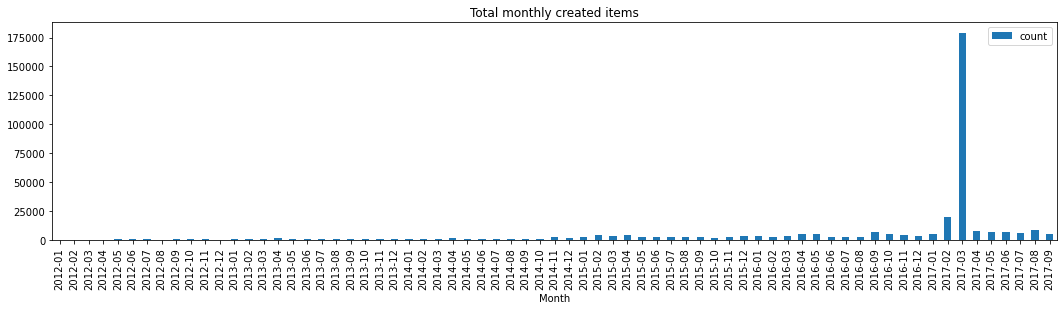

In [198]:
df_created_date.groupby('Month').sum().plot.bar(figsize=(18, 4));
bax.plot
plt.title('Total monthly created items')
plt.show()

**Findings**: The data set gets regurarly updated except for a peak in the beginning of 2017

In [145]:
pip install brokenaxes

Note: you may need to restart the kernel to use updated packages.


In [146]:
from brokenaxes import brokenaxes

https://github.com/bendichter/brokenaxes 

## E. Build a database

Take the cleaned openfoodfacts dataset and put it into an SQL database

1. Restrict your data to 1000 entries and 5 columns of your choice
2. Create a connection to a sqlite3 database
3. Create one or multiple tables, at least one of the tables should have a PRIMARY KEY
4. Fill the database with your data
5. Run at least one query to demonstrate that it works correctly

1. Restrict your data to 1000 entries and 5 columns of your choice

In [148]:
df_short_db = df_short.iloc[0:1004][['code','product_name', 'brands', 'fat_100g','carbohydrates_100g']]

In [149]:
df_short_db.drop_duplicates(subset='code', inplace=True)

In [150]:
df_short_db.code.duplicated().value_counts()

False    1000
Name: code, dtype: int64

In [151]:
df_short_db.shape

(1000, 5)

In [152]:
df_short_db.head(1)

,code,product_name,brands,fat_100g,carbohydrates_100g
0,3087,Farine de blé noir,Ferme t'y R'nao,NaN,NaN


In [153]:
df_short_db.dtypes

code                   object
product_name           object
brands                 object
fat_100g              float64
carbohydrates_100g    float64
dtype: object

2. Create a connection to a sqlite3 database

In [154]:
db = sqlite3.connect("my_database.db")

3. Create one or multiple tables, at least one of the tables should have a PRIMARY KEY

In [155]:
query = "CREATE TABLE food_facts (code INTEGER PRIMARY KEY, product_name TEXT, brands TEXT, fat_100g REAL, carbohydrates_100g REAL);"

In [156]:
cursor = db.cursor()

In [157]:
cursor.execute(query)

In [158]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [159]:
results = cursor.fetchall()
print(results)

[('food_facts',)]


4. Fill the database with your data

In [160]:
df_short_db.to_sql(name='food_facts', con=db, if_exists='append', index=False)

5. Run at least one query to demonstrate that it works correctly

In [161]:
pd.read_sql_query("SELECT * FROM food_facts;",db)

,code,product_name,brands,fat_100g,carbohydrates_100g
0,10,Madeleines nature,Bijou,23.00,55.00
1,30,Cakes Raisins,Bijou,19.00,56.00
2,31,Cakes aux Fruits,Bijou,15.00,60.00
3,50,Financiers aux Amandes,Bijou,23.00,51.00
4,51,Fondants Citron,Bijou,24.00,50.00
...,...,...,...,...,...
995,78895300024,"Panda Brand, Oyster Flavored Sauce","Lee Kum Kee, Lee Kum Kee (Usa) Foods Inc.",NaN,26.32
996,79122112502,Almonds Cookies,Amay's Bakery & Noodle Co. Inc.,26.67,60.00
997,82592194152,"100% Juice Smoothie, Strawberry Banana","Naked, Naked Juice",NaN,13.11
998,82592660152,"Pure Fruit 100% Juice Smoothie, Mighty Mango",Naked,NaN,15.11


## F. Finding correlations

Find correlations between the different data fields. Identify the variables which **most affect the nutritional score** and provide some insight into which factors cause both a **low** or a **high nutritional score**.

In [162]:
df_corr = df.corr().dropna(axis=1, how='all').dropna(how='all')

Working assumption: "most affect" means a positive/negative correlation of more than 0.6. Based on this assumption the variables which most affectnutrition-score-uk_100g are: 

In [163]:
df_corr[abs(df_corr)>0.6].loc['nutrition-score-uk_100g'].dropna()

saturated-fat_100g                      0.633942
-lauric-acid_100g                      -1.000000
omega-9-fat_100g                        0.640127
-oleic-acid_100g                        0.869978
-maltose_100g                           0.997222
serum-proteins_100g                     0.691806
nucleotides_100g                       -0.863384
beta-carotene_100g                      0.686812
bicarbonate_100g                        1.000000
chloride_100g                           0.780068
molybdenum_100g                         0.877297
fruits-vegetables-nuts-estimate_100g   -0.611147
nutrition-score-fr_100g                 0.978487
nutrition-score-uk_100g                 1.000000
Name: nutrition-score-uk_100g, dtype: float64

In [164]:
df[['nutrition-score-uk_100g', '-lauric-acid_100g']].dropna(axis=0, how='any')

,nutrition-score-uk_100g,-lauric-acid_100g
236152,15.0,49.00000
311670,19.0,0.04473


In [165]:
df['-lauric-acid_100g'].isna().sum()

356023

In [166]:
df['nucleotides_100g'].isna().sum()

356018

In [167]:
df['fruits-vegetables-nuts-estimate_100g'].isna().sum()

355624

In [168]:
df['nutrition-score-uk_100g'].isna().sum()

117267

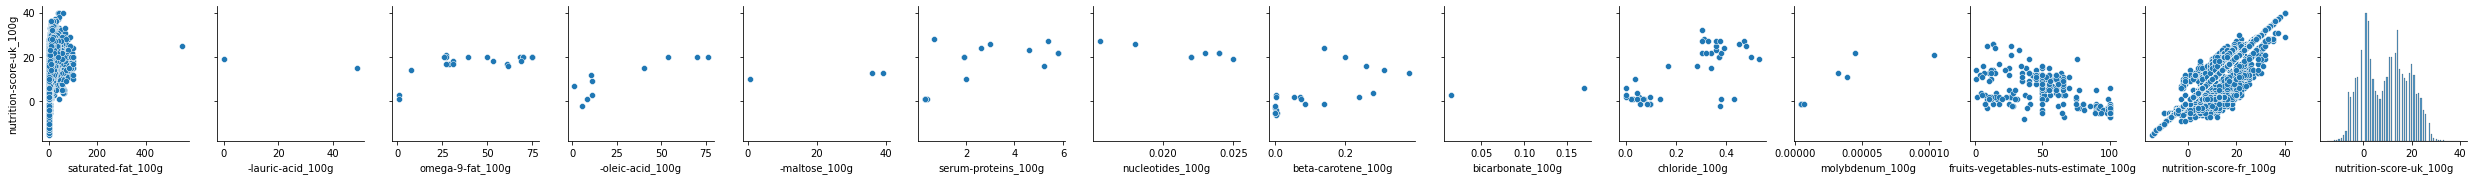

In [169]:
sns.pairplot(df, x_vars = list(df_corr[abs(df_corr)>0.6].loc['nutrition-score-uk_100g'].dropna().index),
            y_vars = 'nutrition-score-uk_100g')

**Preliminary findings:** The reason we see large negative correlations for -lauric-acid_100g, nucleotides_100g and fruits-vegetables-nuts-estimate_100g is because the variables contain mostly null-values only. For the remaining values (as shown above with -lauric-acid_100g) Pandas calculates the correlation. This can result in a strongly misleading correlation since the data set is too small. The pairplot can show how big the data sets are in order to evaluate if the calculated correlations make sense and if we first need to remove some outliers (or incorrect data like negative values where negatives do not make sense).

For a better readability/accuracy the data set needs to be cleaned again for all data (only done for US previously):

In [170]:
df_short_F = df.dropna(axis=1, how='all')

In [171]:
def NaN_if_negative(x):
    if x > 100:
        return np.nan
    return x

In [172]:
df_short_F['saturated-fat_100g'] = df_short_F['saturated-fat_100g'].apply(NaN_if_negative)
df_short_F['-lauric-acid_100g'] = df_short_F['-lauric-acid_100g'].apply(NaN_if_negative)
df_short_F['omega-9-fat_100g'] = df_short_F['omega-9-fat_100g'].apply(NaN_if_negative)
df_short_F['-oleic-acid_100g'] = df_short_F['-oleic-acid_100g'].apply(NaN_if_negative)
df_short_F['-maltose_100g'] = df_short_F['-maltose_100g'].apply(NaN_if_negative)
df_short_F['serum-proteins_100g'] = df_short_F['serum-proteins_100g'].apply(NaN_if_negative)
df_short_F['nucleotides_100g'] = df_short_F['nucleotides_100g'].apply(NaN_if_negative)
df_short_F['beta-carotene_100g'] = df_short_F['beta-carotene_100g'].apply(NaN_if_negative)
df_short_F['bicarbonate_100g'] = df_short_F['bicarbonate_100g'].apply(NaN_if_negative)
df_short_F['chloride_100g'] = df_short_F['chloride_100g'].apply(NaN_if_negative)
df_short_F['molybdenum_100g'] = df_short_F['molybdenum_100g'].apply(NaN_if_negative)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [173]:
def NaN_if_negative(x):
    if x < 0:
        return np.nan
    return x

In [174]:
df_short_F['nutrition-score-fr_100g'] = df_short_F['nutrition-score-fr_100g'].apply(NaN_if_negative)
df_short_F['nutrition-score-uk_100g'] = df_short_F['nutrition-score-uk_100g'].apply(NaN_if_negative)

/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/heyus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
df_short_F = df_short_F.select_dtypes(np.number)

In [176]:
df_short_F.isnull().sum()

additives_n                                185838
ingredients_from_palm_oil_n                349455
ingredients_that_may_be_from_palm_oil_n    341699
energy_100g                                 70076
energy-from-fat_100g                       355324
                                            ...  
collagen-meat-protein-ratio_100g           355845
cocoa_100g                                 354644
carbon-footprint_100g                      355775
nutrition-score-fr_100g                    156231
nutrition-score-uk_100g                    159678
Length: 91, dtype: int64

In [177]:
Q1 = np.percentile(df_short_F, 25, axis=0)
Q3 = np.percentile(df_short_F, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [178]:
boxplot_filter = (df_short_F < lower_bound) | (df_short_F > upper_bound)
print("Number of outliers detected per feature using a boxplot:")
print(boxplot_filter.sum(axis=0))
print("Total number of outliers detected:", boxplot_filter.sum(axis=0).sum())

Number of outliers detected per feature using a boxplot:
additives_n                                0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
energy_100g                                0
energy-from-fat_100g                       0
                                          ..
collagen-meat-protein-ratio_100g           0
cocoa_100g                                 0
carbon-footprint_100g                      0
nutrition-score-fr_100g                    0
nutrition-score-uk_100g                    0
Length: 91, dtype: int64
Total number of outliers detected: 0


In [179]:
boxplot_filter_any  = boxplot_filter.any(axis=1)
boxplot_filter_any.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [180]:
outliers = df_short_F.loc[boxplot_filter_any, :]
outliers.shape

(0, 91)

In [181]:
df_short_F = df_short_F.drop(outliers.index, axis=0)

In [182]:
df_short_F_corr = df_short_F.corr().dropna(axis=1, how='all')

In [183]:
df_short_F_corr = df_short_F.corr().dropna(how='all')

In [184]:
df_short_F_corr = df_short_F_corr[abs(df_short_F_corr)>0.6].loc['nutrition-score-uk_100g'].dropna()

In [185]:
df_short_F[list(df_corr[abs(df_corr)>0.6].loc['nutrition-score-uk_100g'].dropna().index)].isnull().sum()

saturated-fat_100g                      166243
-lauric-acid_100g                       356023
omega-9-fat_100g                        356002
-oleic-acid_100g                        356012
-maltose_100g                           356021
serum-proteins_100g                     356010
nucleotides_100g                        356018
beta-carotene_100g                      355994
bicarbonate_100g                        355928
chloride_100g                           355829
molybdenum_100g                         356007
fruits-vegetables-nuts-estimate_100g    355624
nutrition-score-fr_100g                 156231
nutrition-score-uk_100g                 159678
dtype: int64

In [186]:
df_short_F_corr

saturated-fat_100g         0.617623
-lauric-acid_100g         -1.000000
omega-9-fat_100g           0.640127
-oleic-acid_100g           0.884100
-maltose_100g              0.997222
polyols_100g              -0.702646
serum-proteins_100g        0.691806
nucleotides_100g          -0.863384
bicarbonate_100g           1.000000
chloride_100g              0.806432
molybdenum_100g            0.603996
nutrition-score-fr_100g    0.967428
nutrition-score-uk_100g    1.000000
Name: nutrition-score-uk_100g, dtype: float64

In [187]:
df_corr[abs(df_corr)>0.6].loc['nutrition-score-uk_100g'].dropna()

saturated-fat_100g                      0.633942
-lauric-acid_100g                      -1.000000
omega-9-fat_100g                        0.640127
-oleic-acid_100g                        0.869978
-maltose_100g                           0.997222
serum-proteins_100g                     0.691806
nucleotides_100g                       -0.863384
beta-carotene_100g                      0.686812
bicarbonate_100g                        1.000000
chloride_100g                           0.780068
molybdenum_100g                         0.877297
fruits-vegetables-nuts-estimate_100g   -0.611147
nutrition-score-fr_100g                 0.978487
nutrition-score-uk_100g                 1.000000
Name: nutrition-score-uk_100g, dtype: float64

**Final findings:** For -lauric-acid_100g and nucleotides_100g we can still see the same large negative correlations because both have a large amount of null values in the data set and did not drop out during cleaning. However we should take into account the sum of null values per variable before intepreting the final correlations. The variable fruits-vegetables-nuts-estimate_100g has been dropped during the analysis since the correlation is lower than 0.6 after cleaning the data set. 